# Project Name : House Prices - Advanced Regression Techniques
### Main aim is to predict the house prices with the help of different parameters

## In this notebook we will do complete anlysis of the data in Advance House Price prediction. This icludes:
- Data Analysis
- Feature Engineering
- Feature Selection
- Predictions

### Let's get started with the Data Analyis (EDA) of the dataset
#### We will start by importing our DataSet and different libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### This pd.set_option is for setting up a particular command to run all the time, Display max columns will display all the columns without skipping when called df.head

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df= pd.read_csv("House price train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.shape

(1460, 81)

### In this Data Analysis part we will do the following things:
- See how many NAN vlaues are there 
- Will see the numerical and categorical variables in the dataset
- Will see the Outliers

## Missing Data

In [13]:
features_with_nan= [features for features in df.columns if df[features].isnull().sum()>1]

### Let us calculate how much Percentage of Null values are present in each feature

In [14]:
for features in features_with_nan:
    print(features,np.round(df[features].isnull().mean(),4), " % Missing values")

LotFrontage 0.1774  % Missing values
Alley 0.9377  % Missing values
MasVnrType 0.0055  % Missing values
MasVnrArea 0.0055  % Missing values
BsmtQual 0.0253  % Missing values
BsmtCond 0.0253  % Missing values
BsmtExposure 0.026  % Missing values
BsmtFinType1 0.0253  % Missing values
BsmtFinType2 0.026  % Missing values
FireplaceQu 0.4726  % Missing values
GarageType 0.0555  % Missing values
GarageYrBlt 0.0555  % Missing values
GarageFinish 0.0555  % Missing values
GarageQual 0.0555  % Missing values
GarageCond 0.0555  % Missing values
PoolQC 0.9952  % Missing values
Fence 0.8075  % Missing values
MiscFeature 0.963  % Missing values


### Let us see if there is a relationship between the nan value features and the sales price

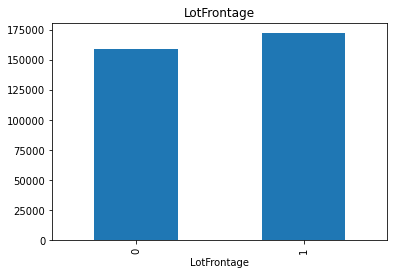

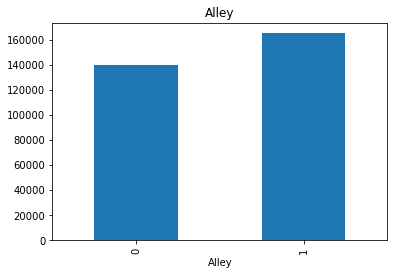

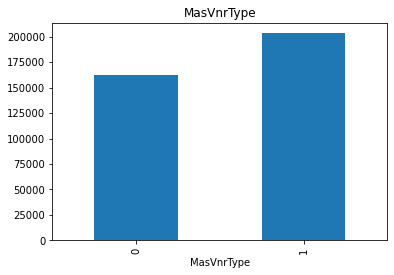

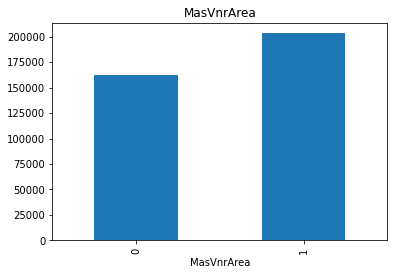

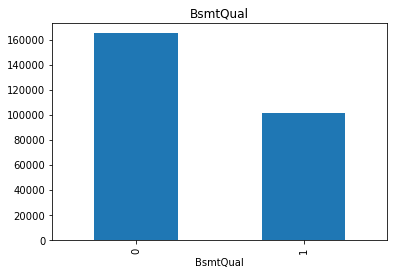

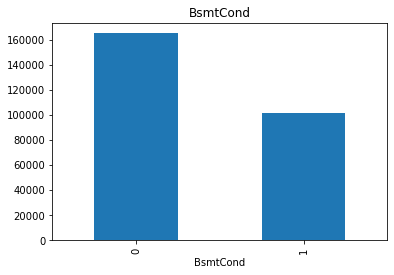

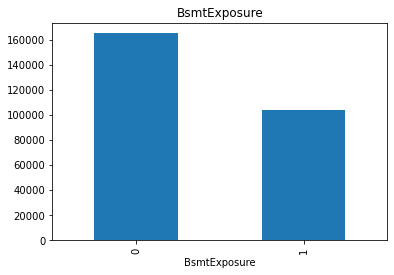

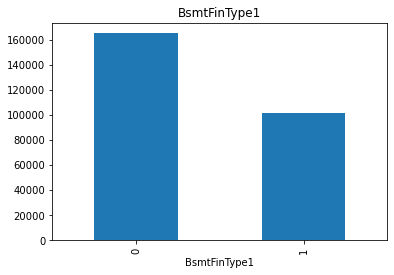

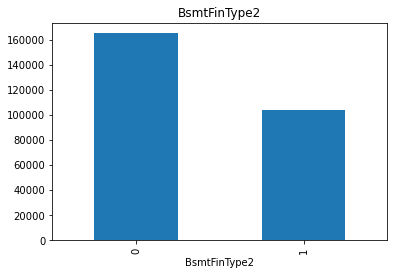

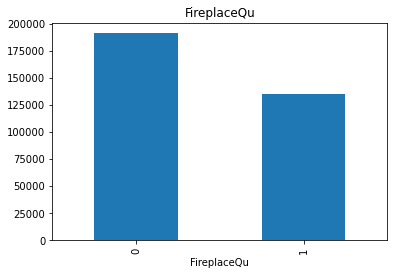

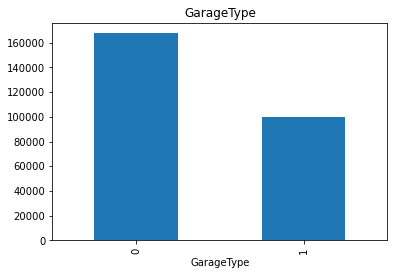

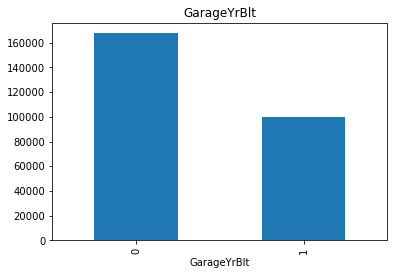

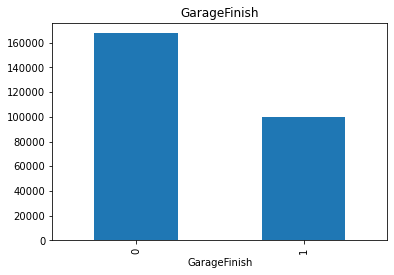

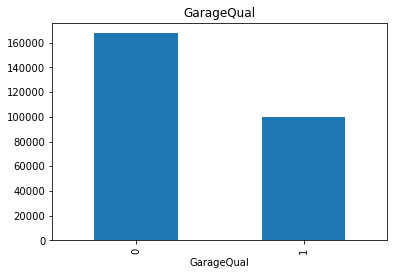

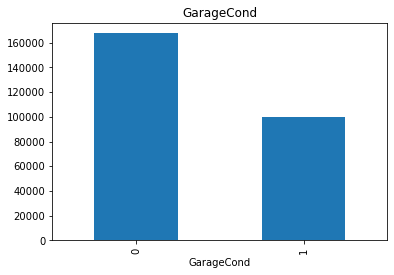

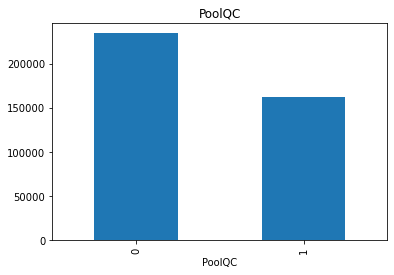

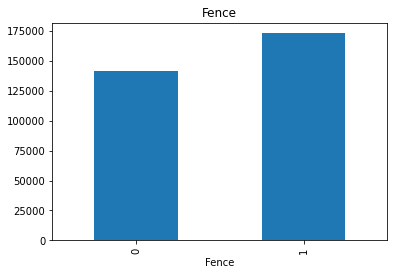

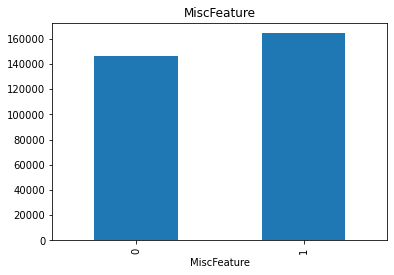

In [15]:
for feature in features_with_nan:
    data= df.copy()
    data[feature]= np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

### As we see the null values also have an impact on the Sale Price hence we will deal with them in the Feature Engineering part.

## Numerical Variables

### Let's find out how many numerical features we have and what is there impact on SalesPrice.

In [16]:
numerical_var= [feature for feature in df.columns if df[feature].dtype != 'O']

In [17]:
df[numerical_var].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### In this we have year variables also we can make them into group and see the impact on SalePrice


In [18]:
year_feature= [feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Year Sold v/s Sale Price')

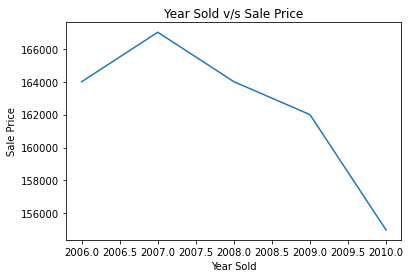

In [20]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title("Year Sold v/s Sale Price")

### As we see the sale price of the houses decreases as time goes

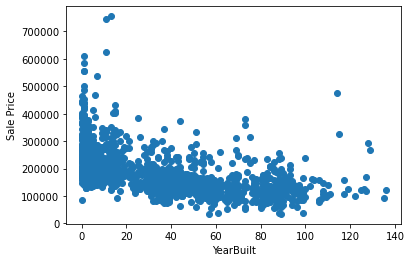

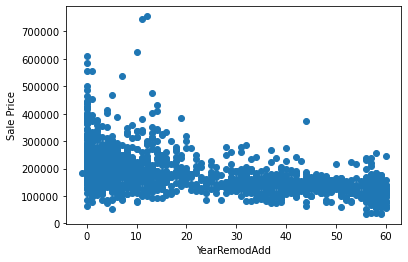

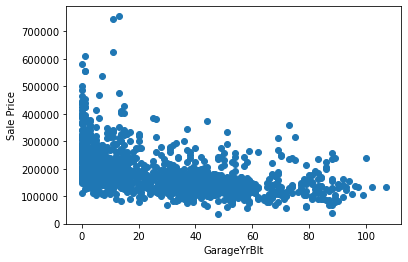

In [21]:
for feature in year_feature:
    if feature!= 'YrSold':
        data= df.copy()
        data[feature]= data['YrSold']- data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.show()


### In this analysis we see the Difference with the Year Sold and the different features and compare it with the sale price

#### There are various Discrete Variables also , let's write an algorithm to find out the discrete variables

In [22]:
Discrete_feature= [feature for feature in numerical_var if len(df[feature].unique())<25 and feature not in year_feature + ['Id']]

In [23]:
print('No of Discrete Feature: {}'.format(len(Discrete_feature)))

No of Discrete Feature: 17


In [24]:
df[Discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### Let's find relation btw these features and sale price

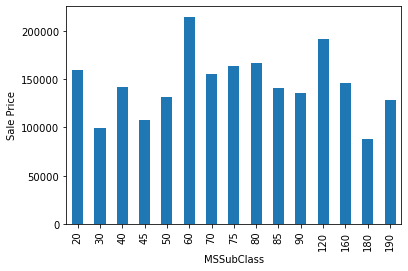

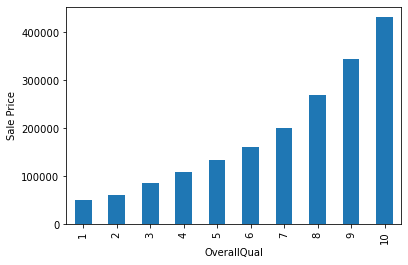

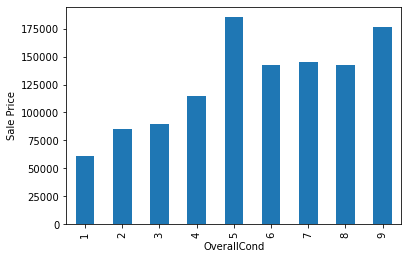

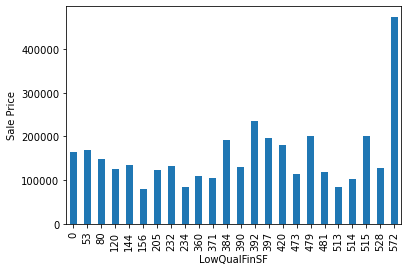

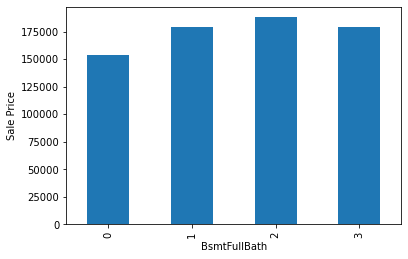

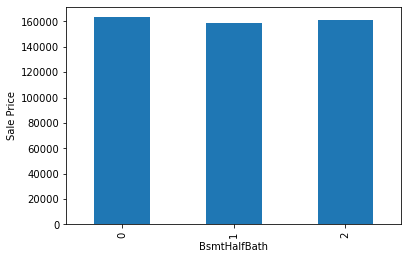

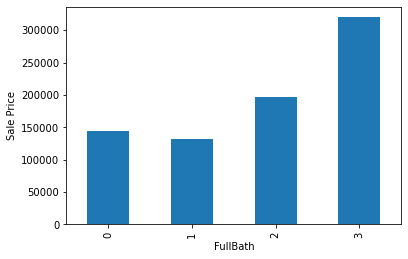

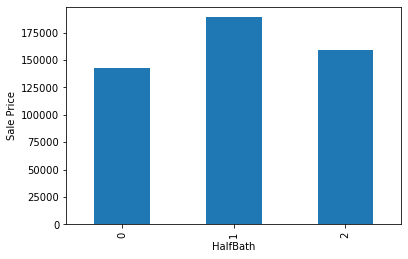

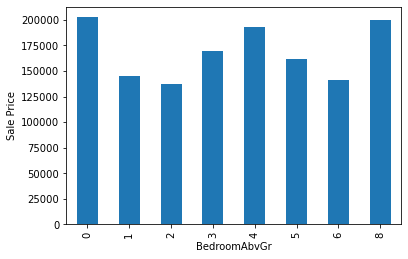

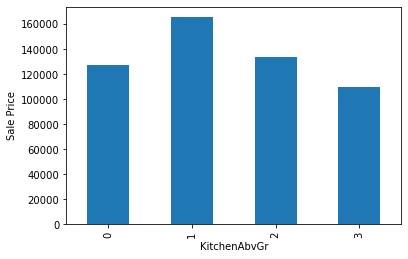

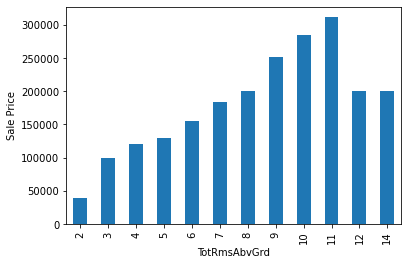

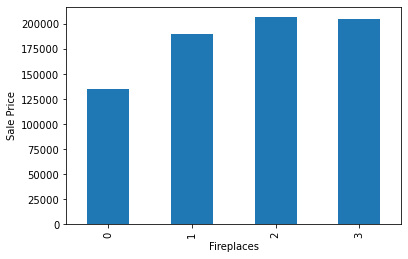

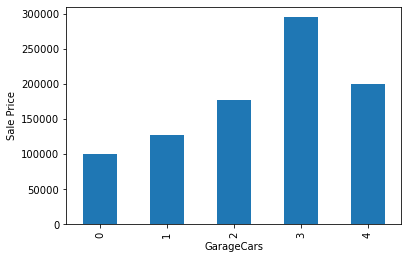

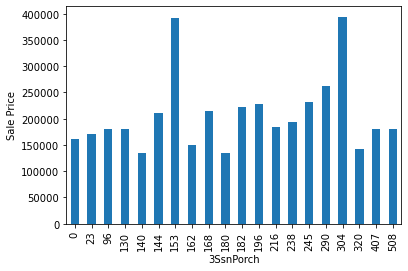

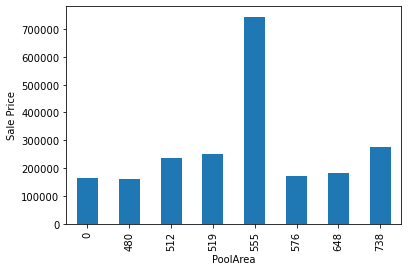

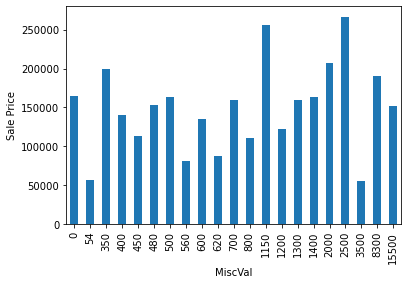

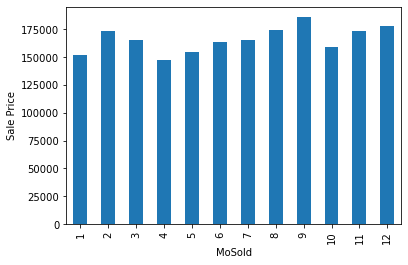

In [25]:
for feature in Discrete_feature:
    data= df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

### Let's do the same for contineuous variable

In [26]:
contineous_var= [feature for feature in numerical_var if feature not in Discrete_feature+year_feature + ['Id'] ]

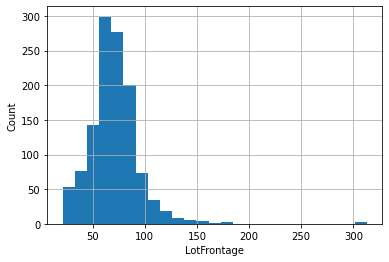

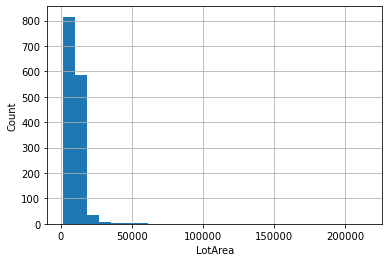

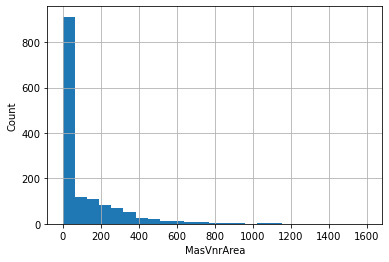

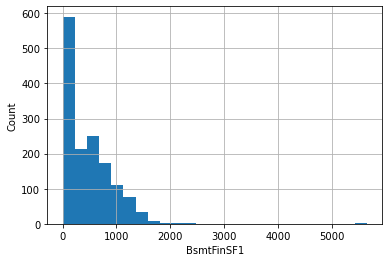

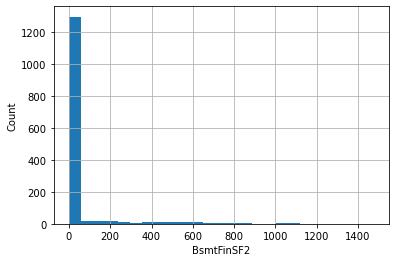

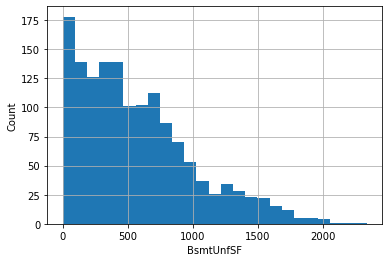

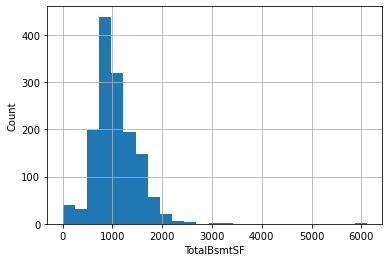

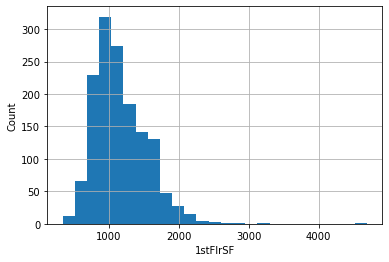

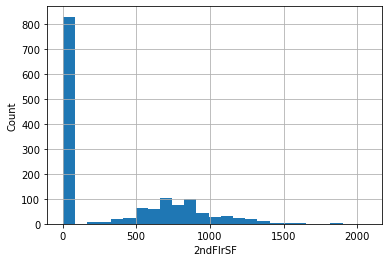

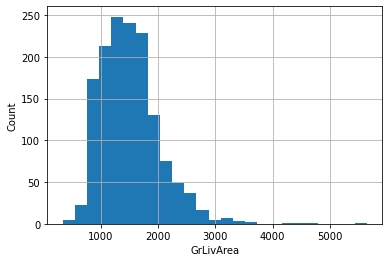

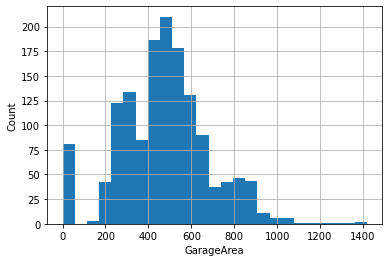

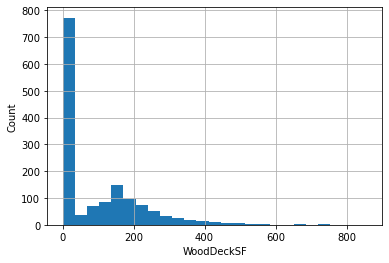

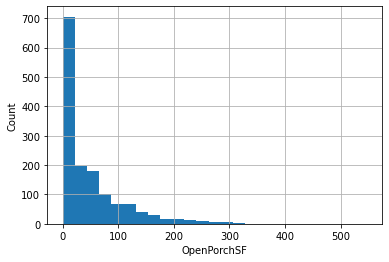

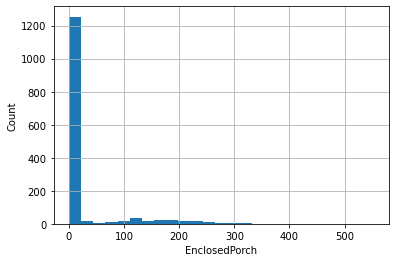

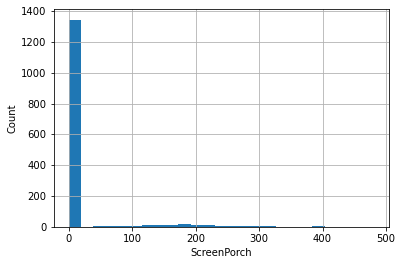

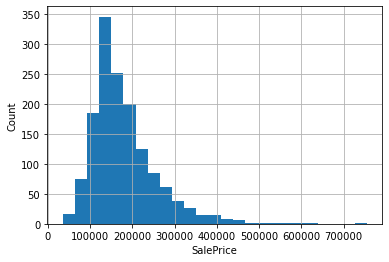

In [27]:
for feature in contineous_var:
    data= df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
    

### As we see some of our features are Normally Distributed while some are not
### We will convert these into normal distributions

### Let's perform a log Transformation in the above Continuous Features

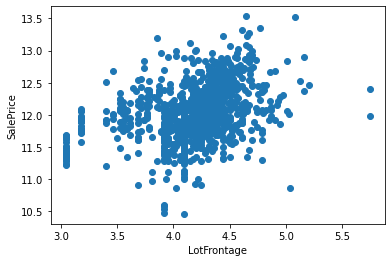

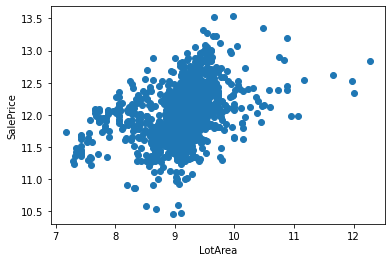

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


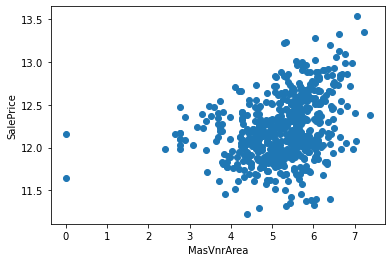

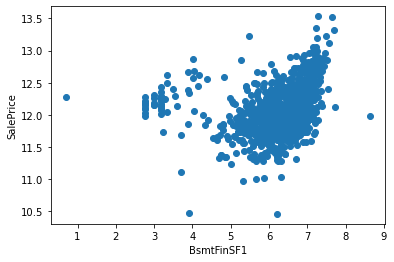

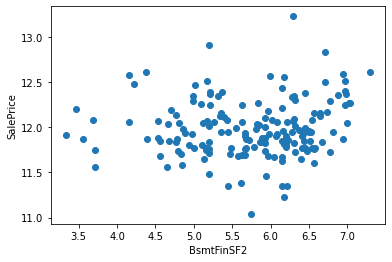

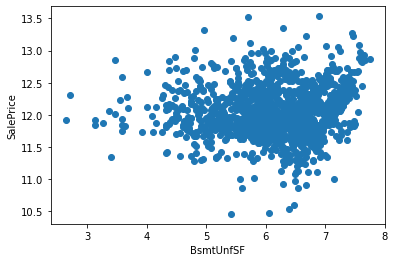

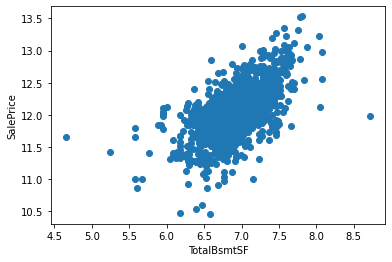

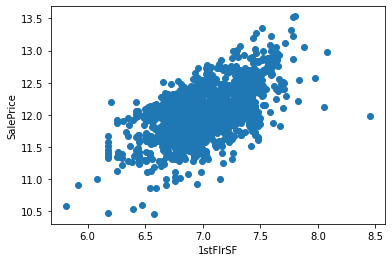

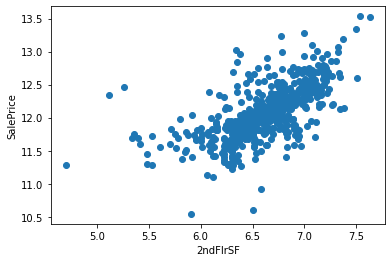

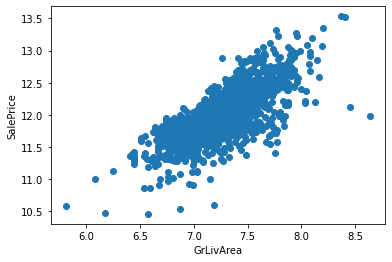

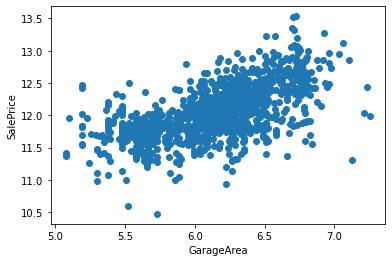

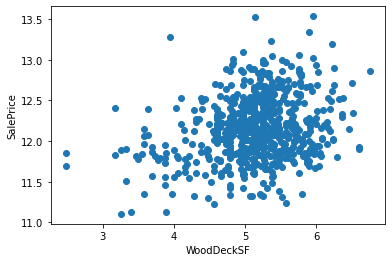

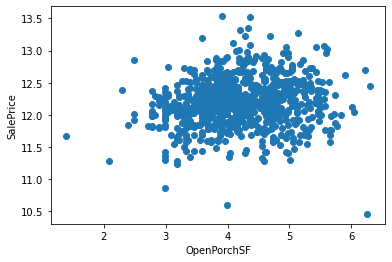

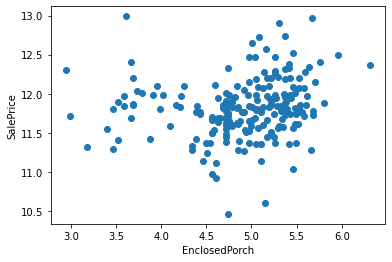

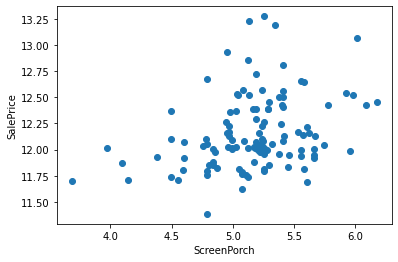

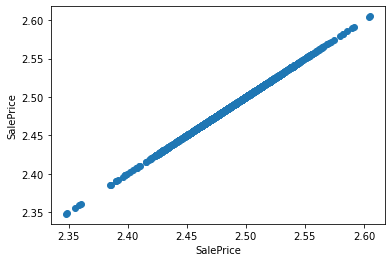

In [28]:
for feature in contineous_var :
    data= df.copy()
    data[feature]= np.log(data[feature])
    data['SalePrice']= np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    

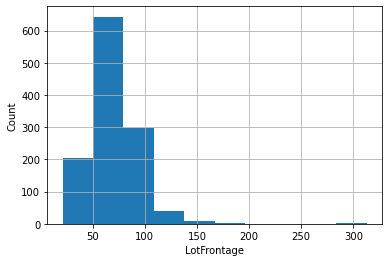

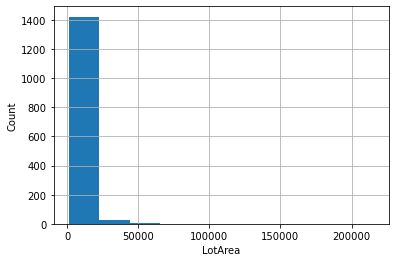

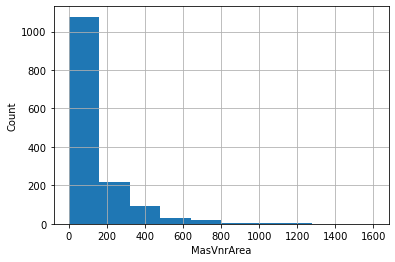

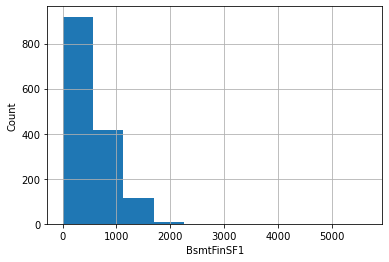

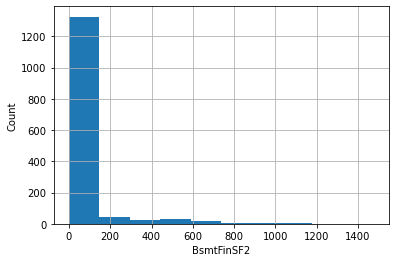

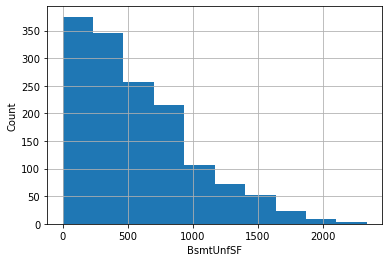

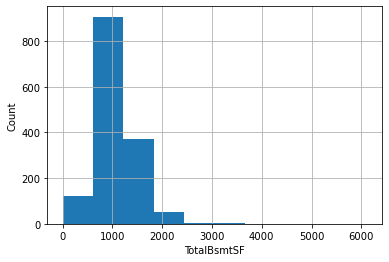

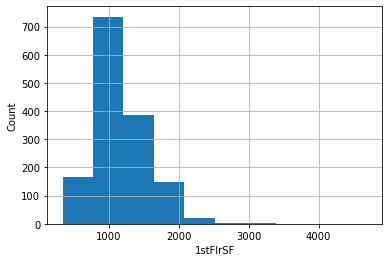

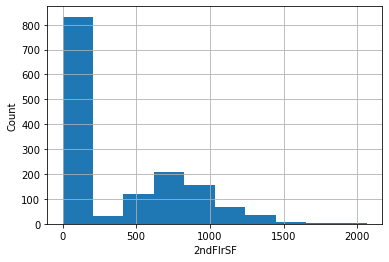

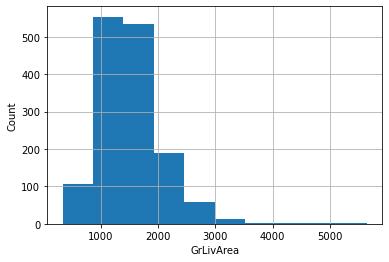

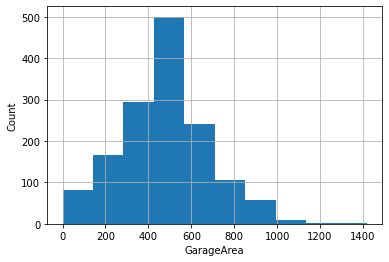

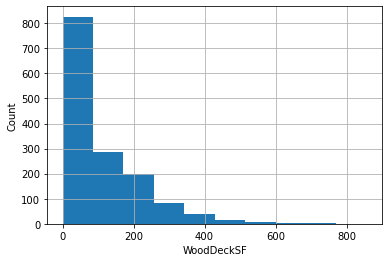

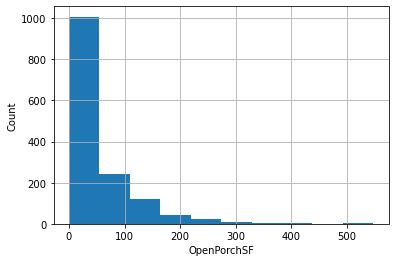

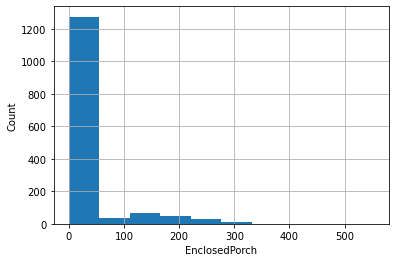

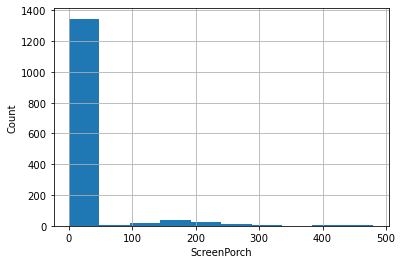

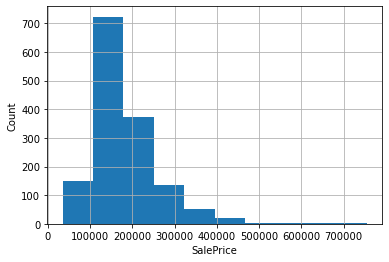

In [29]:
for feature in contineous_var :
    data= df.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### As we can see after doing Log Normal Transformation our data is much more Normally Distributed
    
    

## Q Q Plot

In [30]:
import scipy.stats as stat
import pylab

In [31]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

C:\Users\Z\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


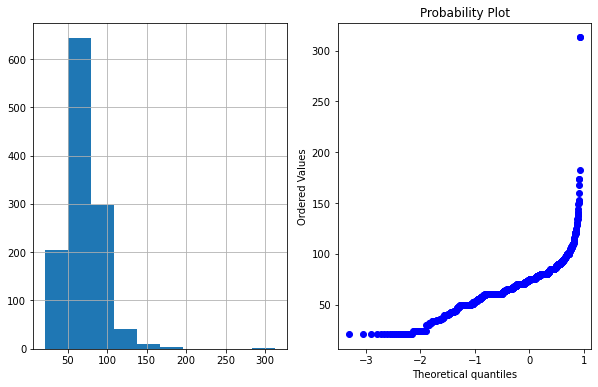

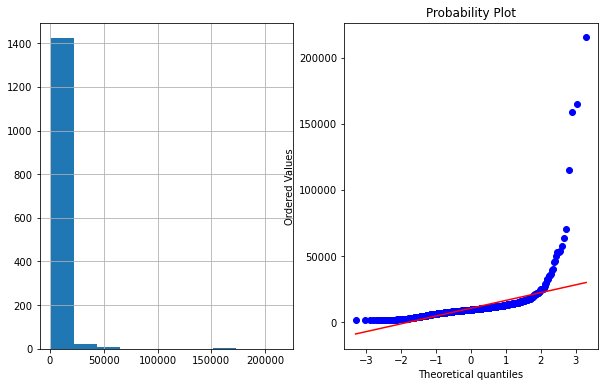

C:\Users\Z\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


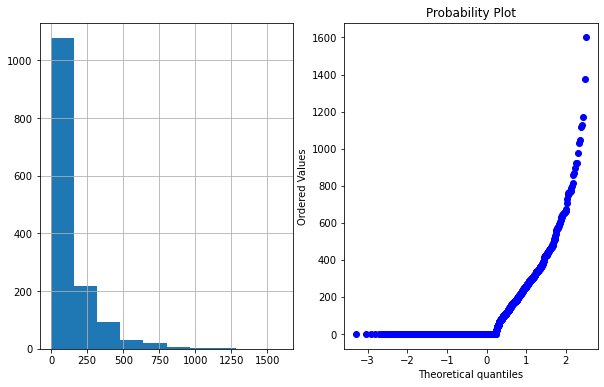

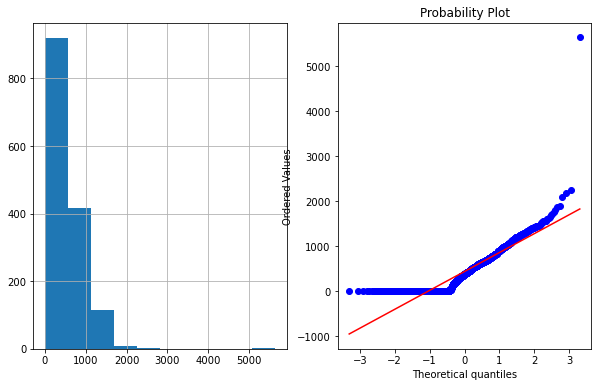

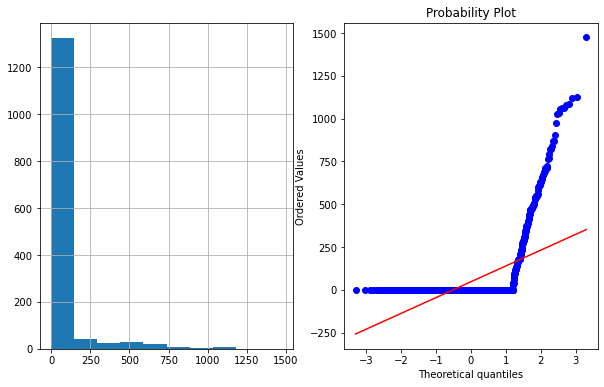

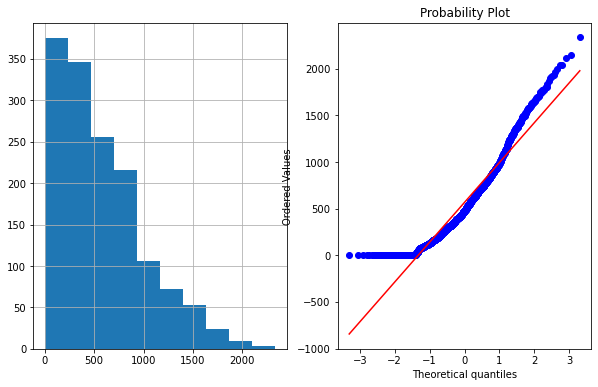

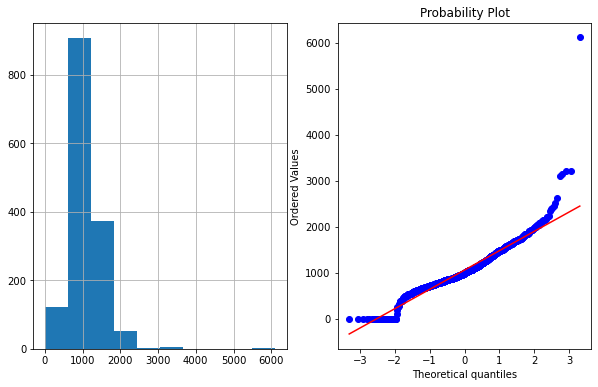

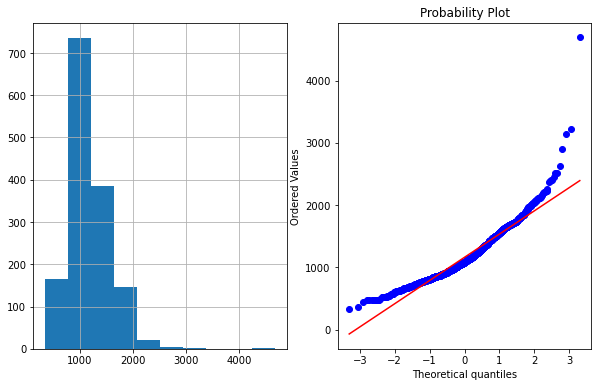

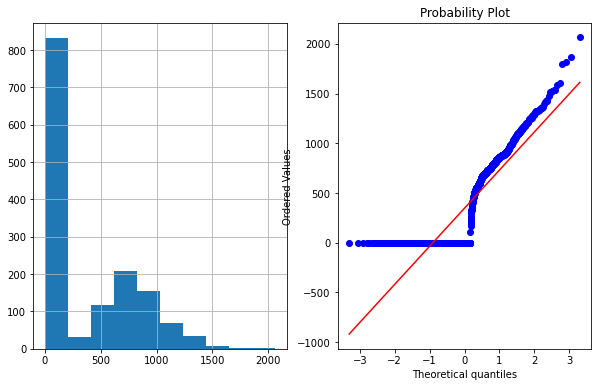

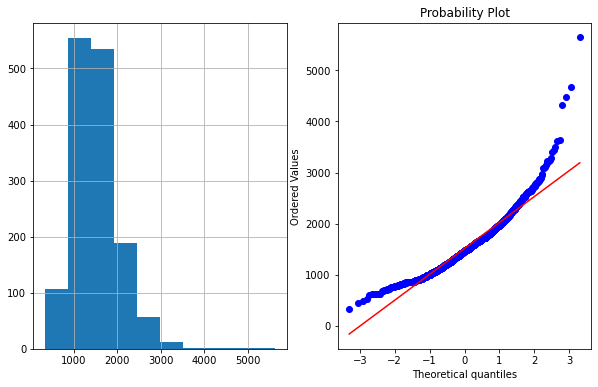

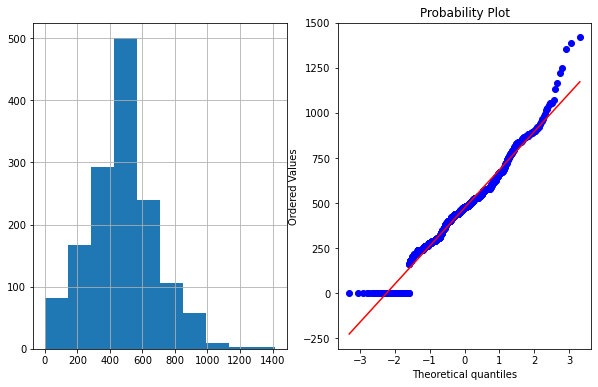

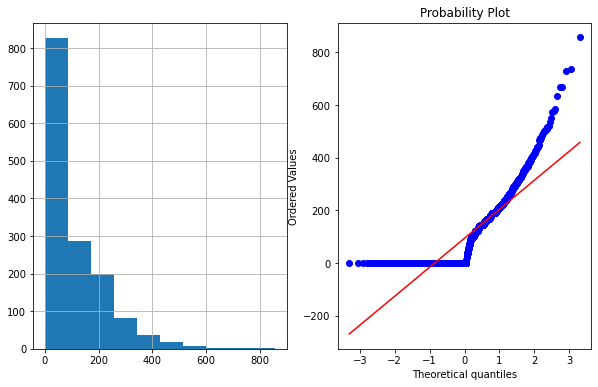

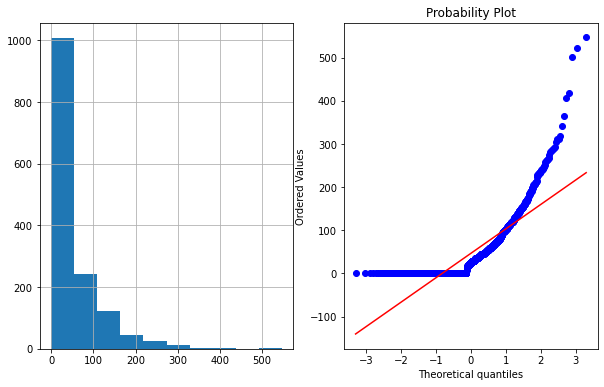

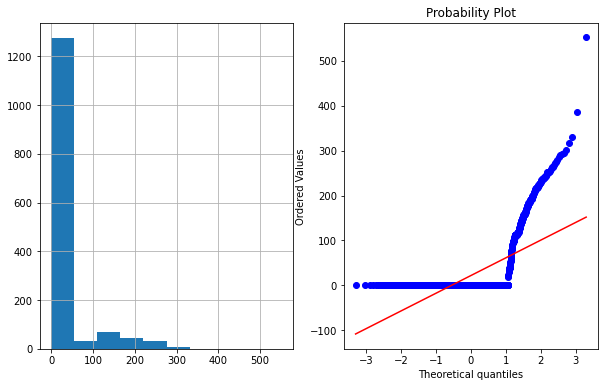

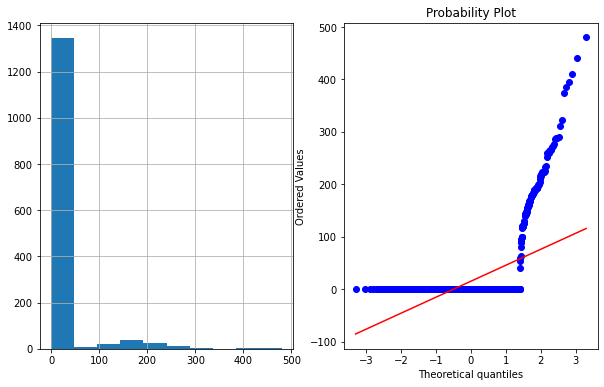

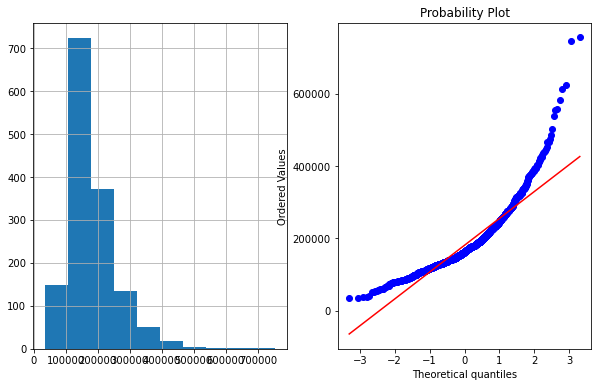

In [32]:
for feature in contineous_var:
    plot_curve(df,feature)
    


### We use Q Q Plot to see weather our data is normally transformed or not 
### As we can see most of the features are fitting into  a Straight Line which means they are transformed normally

## Outliers

### Let us see how many outliers our feature have and how we can handle them

### We will use Box Plot for this purpose

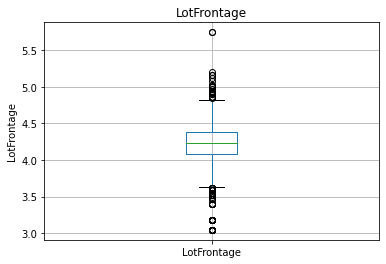

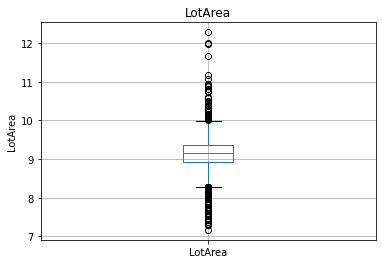

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1157: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


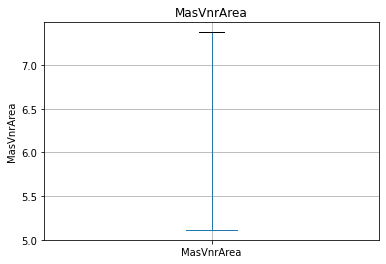

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


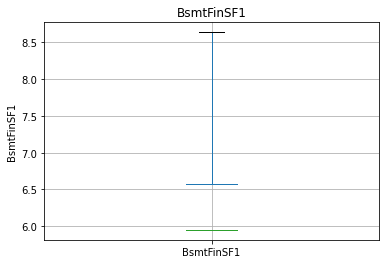

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


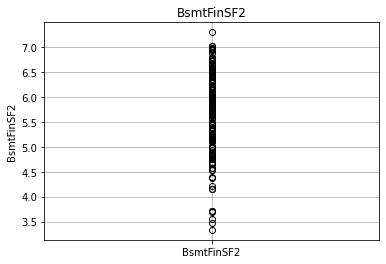

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


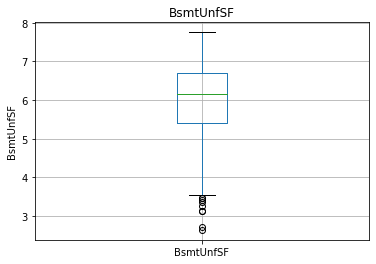

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


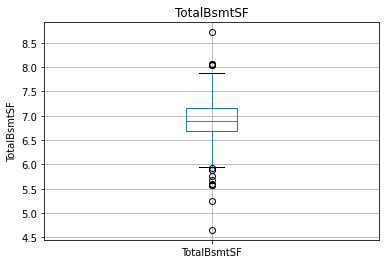

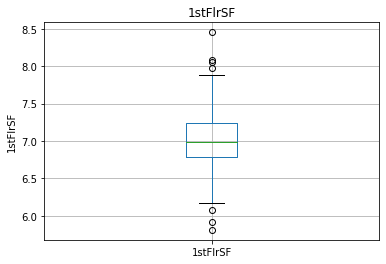

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1157: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


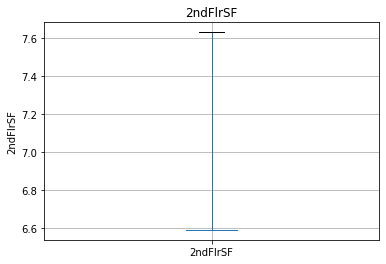

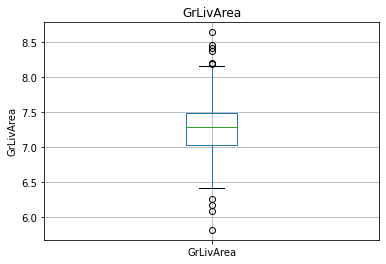

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


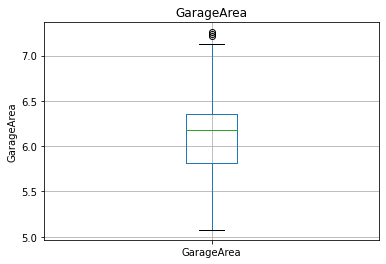

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1157: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)


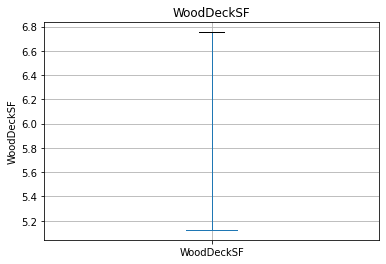

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


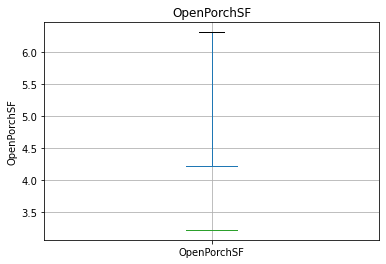

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


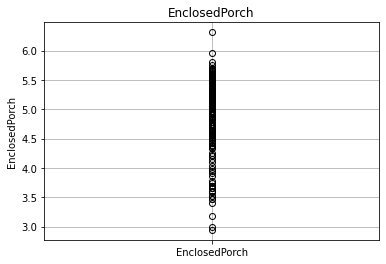

C:\Users\Z\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Z\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


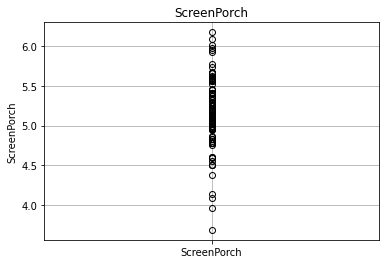

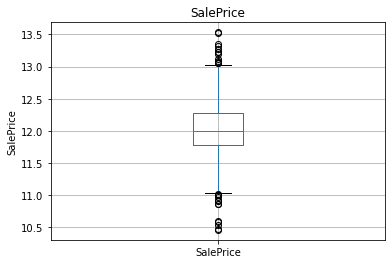

In [33]:
for feature in contineous_var :
    data= df.copy()
    data[feature]= np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

### We will handle them in the Feature Engineering Section

## Categorical Variables
### Let's have a look on our Categorical Variables

In [34]:
category_var= [feature for feature in df.columns if df[feature].dtypes=='O']

In [35]:
print(len(category_var))


43


In [36]:
df[category_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### As we can see there are 43 category var, now let's see how many variables they have

In [37]:
for feature in category_var:
    print("The feature is {}, and the number of variables it has is {}".format(feature,len(df[feature].unique())))
    
    


The feature is MSZoning, and the number of variables it has is 5
The feature is Street, and the number of variables it has is 2
The feature is Alley, and the number of variables it has is 3
The feature is LotShape, and the number of variables it has is 4
The feature is LandContour, and the number of variables it has is 4
The feature is Utilities, and the number of variables it has is 2
The feature is LotConfig, and the number of variables it has is 5
The feature is LandSlope, and the number of variables it has is 3
The feature is Neighborhood, and the number of variables it has is 25
The feature is Condition1, and the number of variables it has is 9
The feature is Condition2, and the number of variables it has is 8
The feature is BldgType, and the number of variables it has is 5
The feature is HouseStyle, and the number of variables it has is 8
The feature is RoofStyle, and the number of variables it has is 6
The feature is RoofMatl, and the number of variables it has is 8
The feature 

### As we can see there are variavles which have less categories  can be done through One Hot ENcoding but some have more categories hence we need to think somwthing else
### We will figure this out in the Feature Engineering Section

### Let's have a relation between these feature and our dependent var

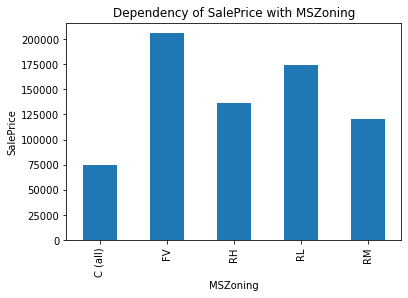

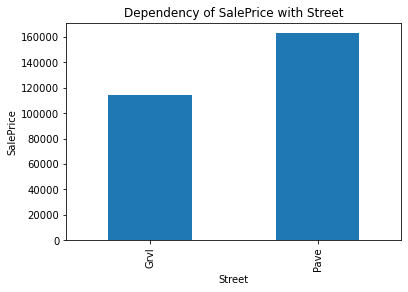

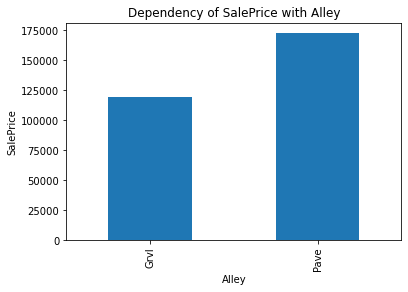

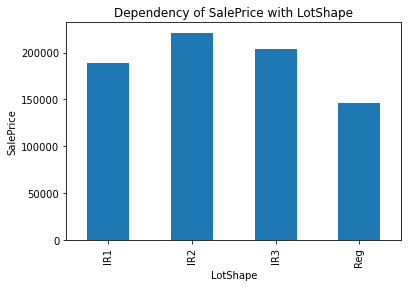

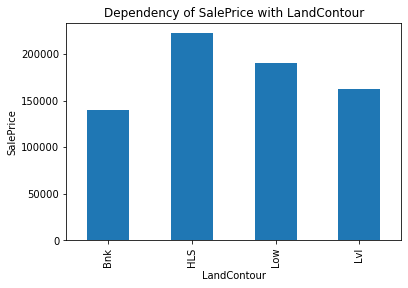

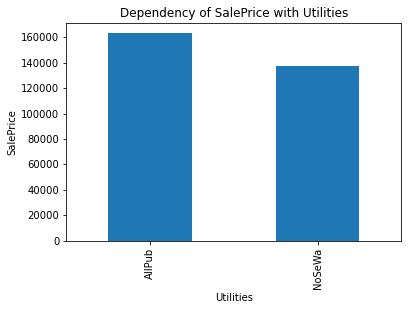

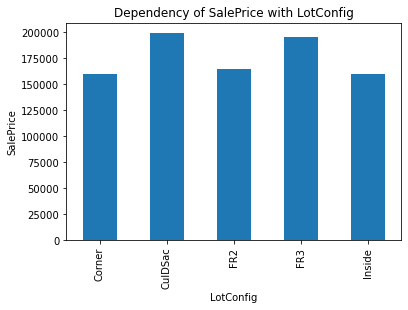

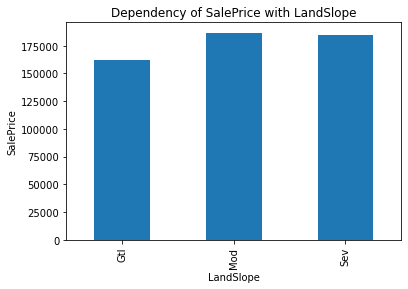

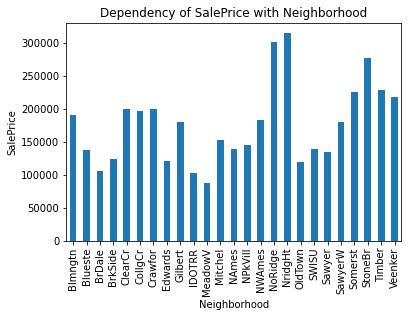

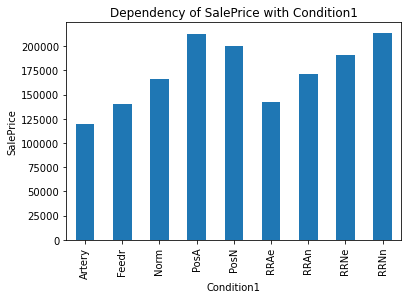

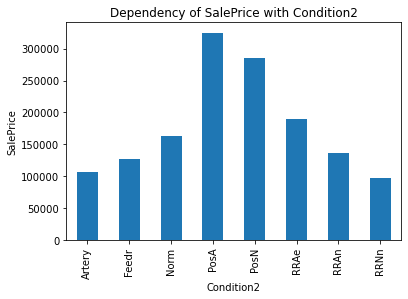

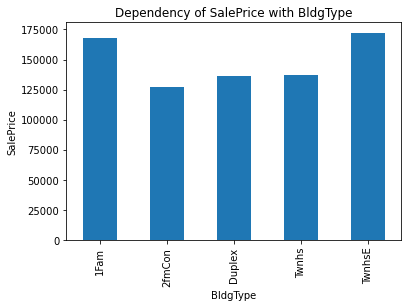

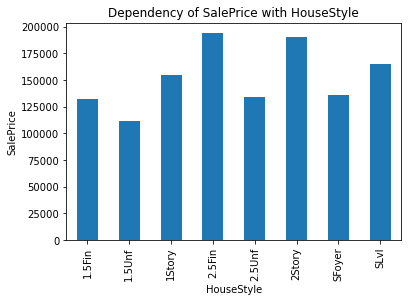

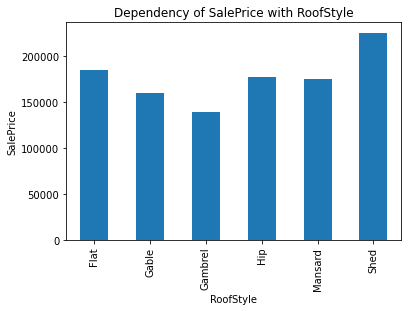

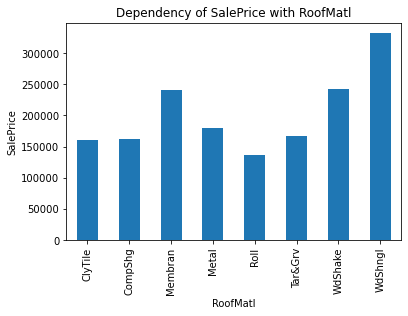

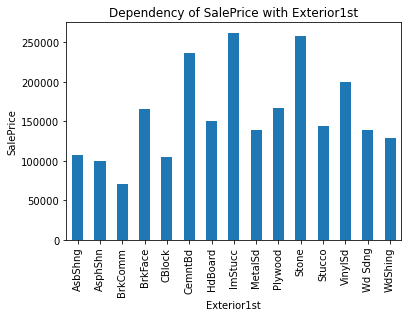

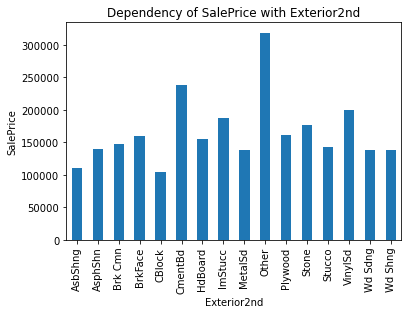

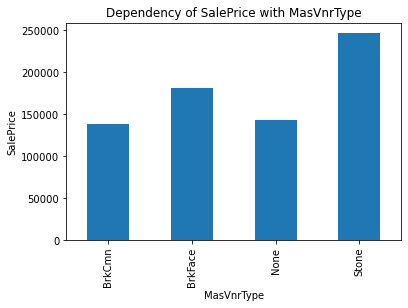

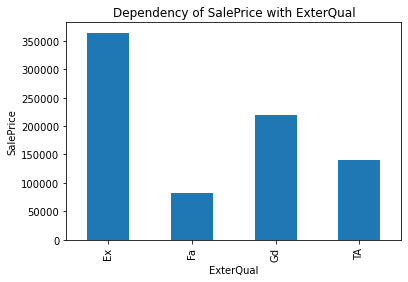

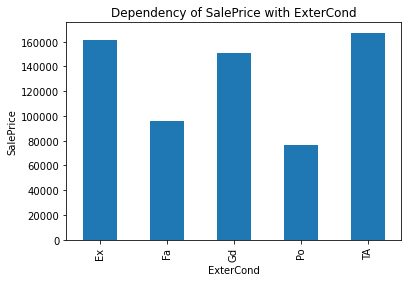

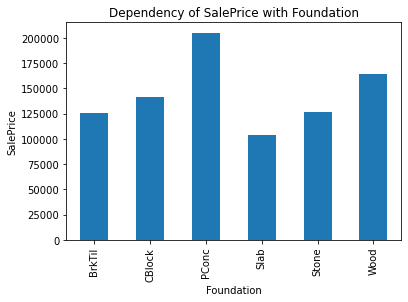

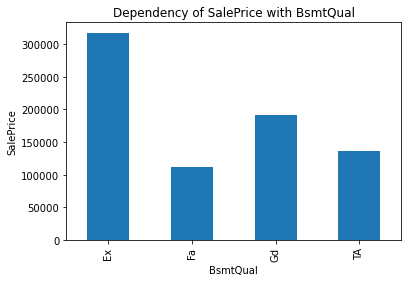

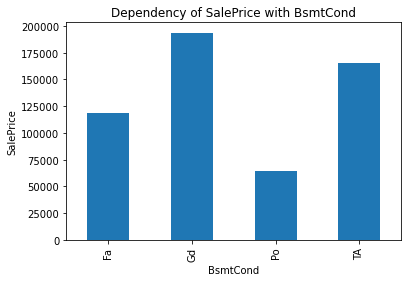

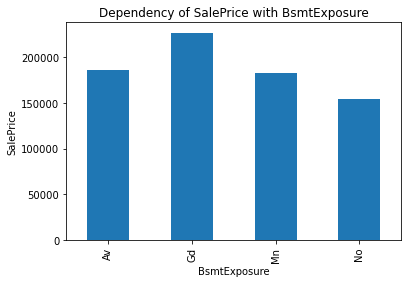

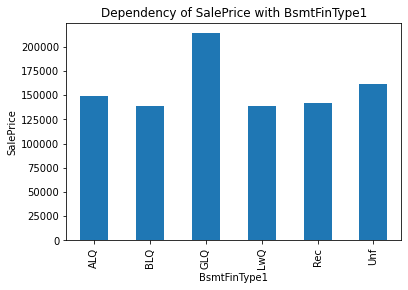

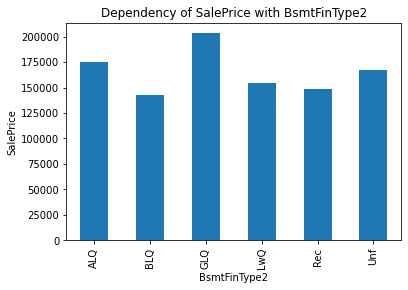

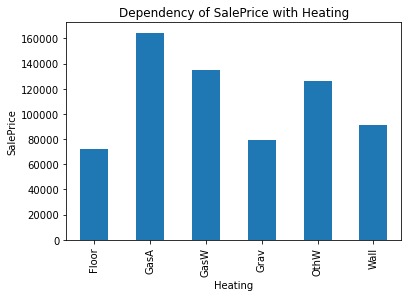

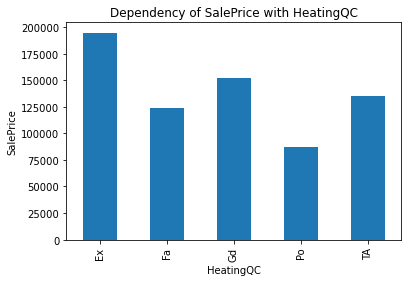

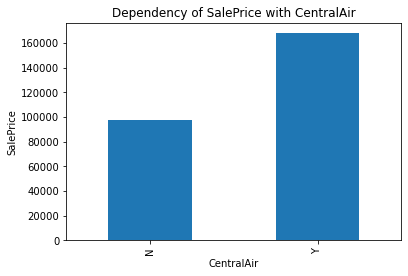

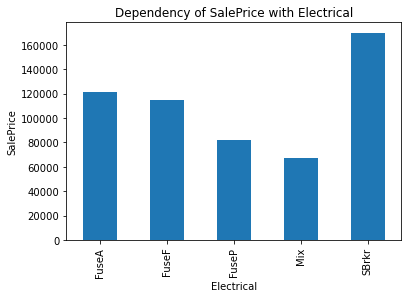

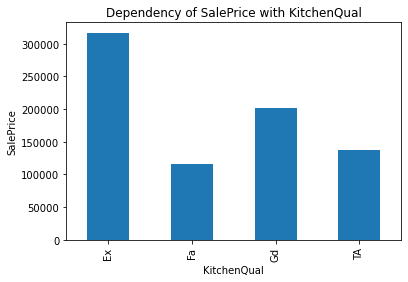

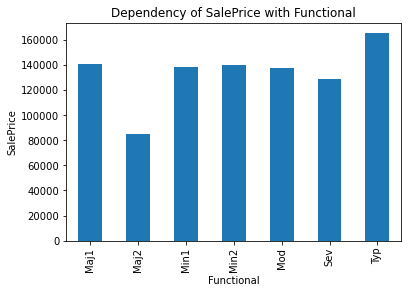

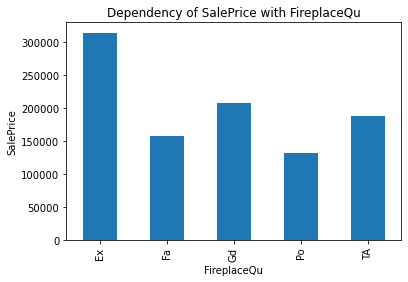

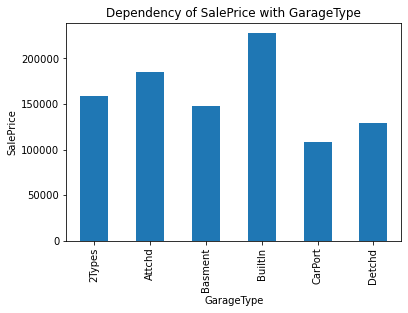

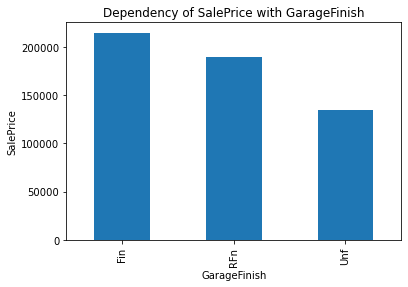

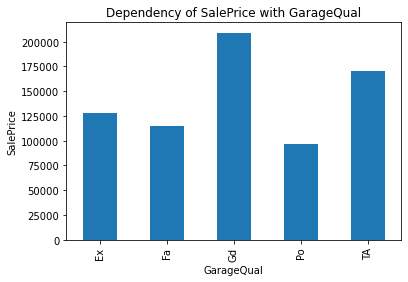

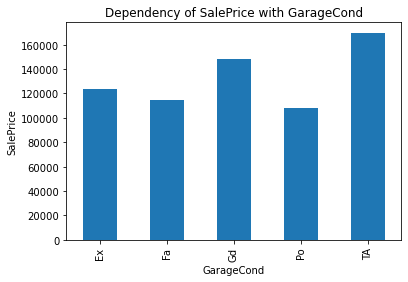

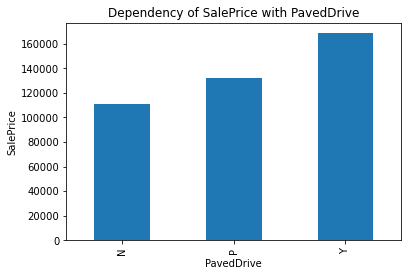

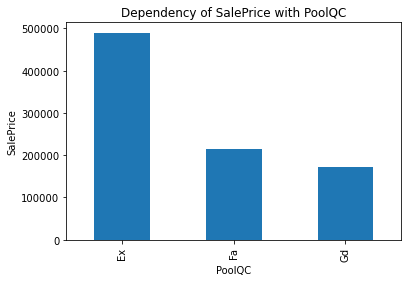

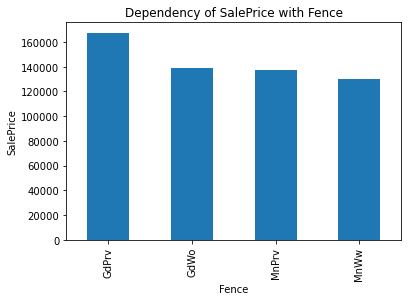

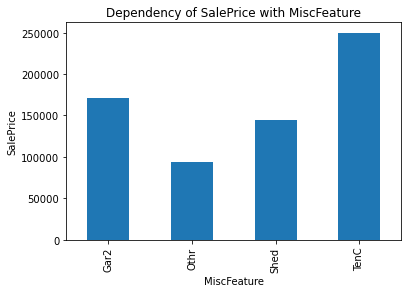

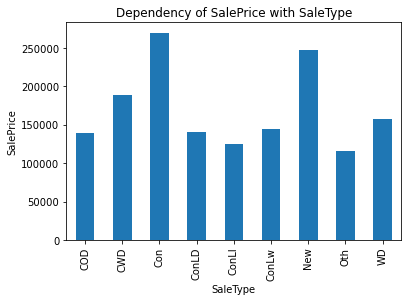

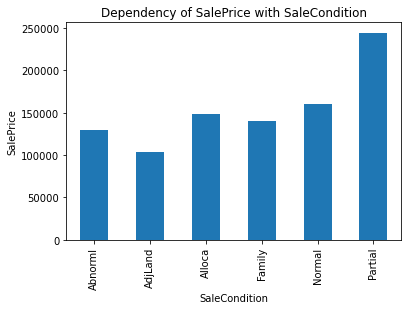

In [38]:
for feature in category_var:
    data= df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('Dependency of SalePrice with {}'.format(feature))
    plt.show()

### We have seen how different variables have there effect of Sale Price

## Now that we have done our Analysis it's we do the feature Engineering part with information gained from the EDA

# Feature Engineering
## In this section we will do the following tasks:
- Handle Missing Values
- Handle Categorical Features
- Handle Outliers
- Standardisation and Normalisation of Contineous Variable

## Handling Missing Values

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Let's handle missing values for Categorical features

In [40]:
feature_nan= [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype=='O']

In [41]:
df[feature_nan]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [42]:
def fill_na(df,feature_nan) :
    data= df.copy()
    data[feature_nan]= data[feature_nan].fillna('missing')
    return data

In [43]:
df= fill_na(df,feature_nan)

In [44]:
df[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

#### We replaced all the nan values with a Missing label

### Handling missing values for numerical features

In [45]:
num_nan= [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype!= 'O']

In [46]:
num_nan


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [47]:
df[num_nan].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


### Let us replace these missing values with medians

In [48]:
for feature in num_nan:
    df[feature+'nan']= np.where(df[feature].isnull(),1,0)
    df[feature]= df[feature].fillna(df[feature].median())

In [49]:
df[num_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [50]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
SaleCondition     0
SalePrice         0
LotFrontagenan    0
MasVnrAreanan     0
GarageYrBltnan    0
Length: 84, dtype: int64

### We have removed all the nan values 
- For categorical feature we replace it with a new lable 'Missing'
- For Numerical Feature we replace it with Median of that feature

### Let's handle Temporal Variables

In [51]:
temp_var= [feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature ]

In [52]:
temp_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [53]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature]= df['YrSold']- df[feature]
    
    

In [54]:
df[temp_var].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


### Here we converted all the Other features into how much years with respect to Year Sold

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,250000,0,0,0


### Log Transformation

In [56]:
num =['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num:
    df[feature]= np.log(df[feature]) 

In [57]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,12.429216,0,0,0


### Handling rare categorical features

#### In this we will remove those categories which are very low in number of appereances

In [58]:
cat_feature= [feature for feature in df.columns if df[feature].dtype== 'O']

In [59]:
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [60]:
for feature in cat_feature:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')


In [61]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [70]:
for feature in cat_feature:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

## Feature Scaling 

In [71]:
scale_feature= [feature for feature in df.columns if feature not in ['SalePrice','Id']]

In [72]:
df[scale_feature]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,...,4,2,0,2,2008,2,3,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,...,4,2,0,5,2007,2,3,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,...,4,2,0,9,2008,2,3,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,...,4,2,0,2,2006,2,0,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,...,4,2,0,12,2008,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,1,2,0,1,1,0,...,4,2,0,8,2007,2,3,0,0,0
1456,20,3,4.442651,9.486076,1,2,0,1,1,0,...,2,2,0,2,2010,2,3,0,0,0
1457,70,3,4.189655,9.109636,1,2,0,1,1,0,...,3,1,2500,5,2010,2,3,0,0,0
1458,20,3,4.219508,9.181632,1,2,0,1,1,0,...,4,2,0,4,2010,2,3,0,0,0


In [73]:
len(scale_feature)

82

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler= MinMaxScaler()

In [76]:
scaler.fit(df[scale_feature])

MinMaxScaler()

In [77]:
scaler.transform(df[scale_feature])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [87]:
df= pd.concat([df[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[scale_feature]),columns= scale_feature)],axis=1)

In [90]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [94]:
df.to_csv('X_train.csv',index=False)